# 확률 기반 (Probability_based )

모델이 데이터를 해석하고 예측할 때 확률적 접근 방식을 사용한다는 것을 의미한다. 즉, 불확실성을 고려하여 의사 셜정을 내리는 방식이다.



### 불확실성이란,
단 하나의 확정적인 출력값을 내놓는 것이 아니라, 여러개의 가능한 결과와 그에 대한 확률을 계산하는 방식을 말한다.



### 예를 들어,

- 스펨일 확률 = 85%
- 스팸이 아닐 확률 = 15%

확률을 고려하면 85%는 비교적 높지만, 100% 확신할 수는 없다는 점을 인식하고, 추가적인 정보를 활용해 더 나은 결정을 내릴 수도 있다.

즉, **"이게 맞다"**가 아니라 **"이게 맞을 확률이 90%다"**라고 생각하는 방식이다.

# Linear Discriminant Analysis (LDA)




LDA는 Classification과 Dimensional Reduction까지 동시에 사용하는 알고리즘이다.

입력 데이터 세트를 저차원 공간으로 projection(투영)해 차원을 축소하는 기법이며 ' 지도학습 '에서 사용된다.

즉, 차원이 줄어들면 연산량이 줄어듬 -> 학습 효율성을 올림

### 투영

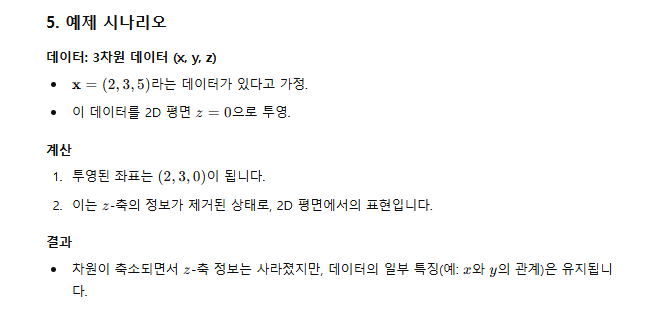



---


### LDA는 아래와 같은 두 가지 성질을 가진 벡터를 찾는다.

if 데이터 포인트들을 투영(projection) 시켰을때,

1. 클래스 간의 거리가 최대가 되게 하는 벡터

2. 클래스 내의 분산이 최소가 되게하는 벡터

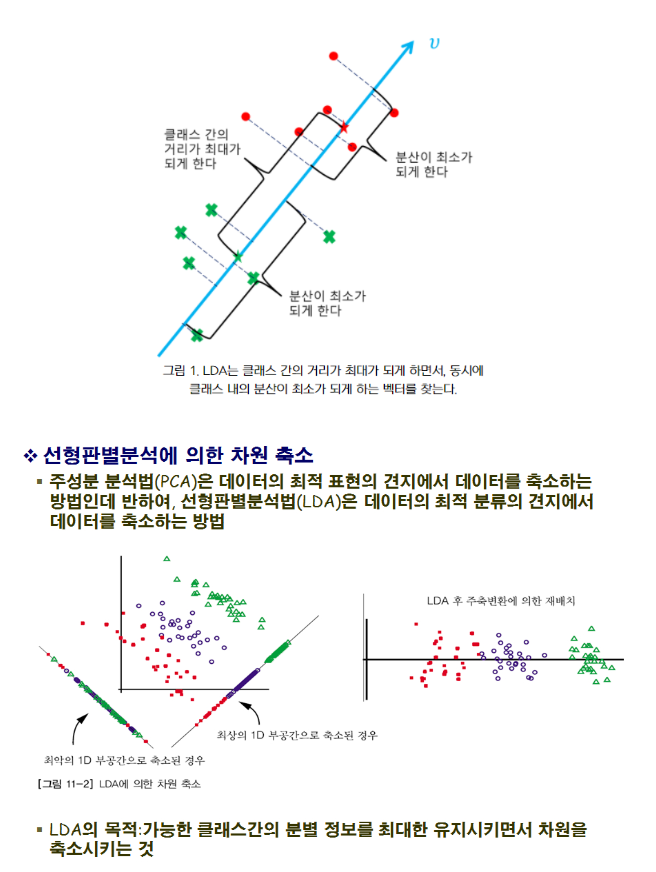

### Variance and Co-Variance 분산과 공분산




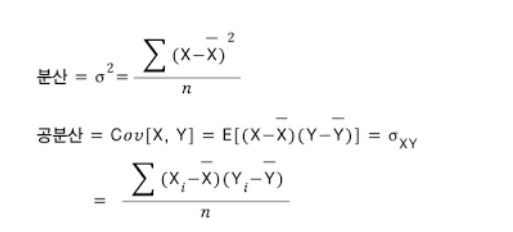

x = 표본 데이터의 값

x- = 데이터의 평균

n = 데이터의 크기


- Variance 분산
  - 분산은 데이터가 평균값을 중심으로 얼마나 떨어져 있는지를 나타낸다.(표준편차의 제곱)


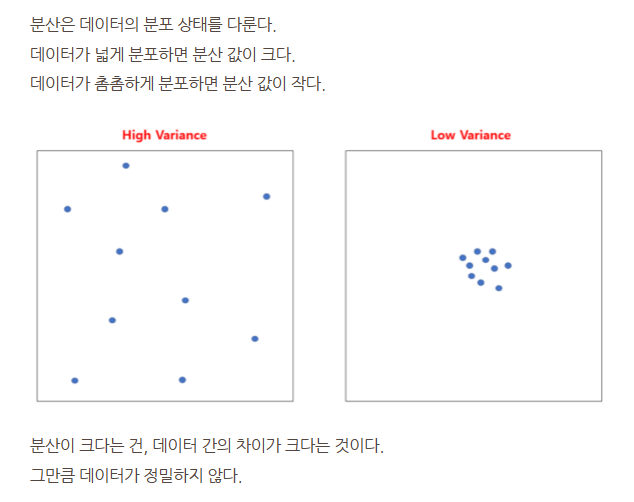

- Co-variance 공분산
  - Variance는 변수 하나, 공분산은 변수 둘 사이의 분산으로 확장한 것 이다.
  - 두 변수 사이에 선형관계가 있는가를 알아보는게 공분산이다.

    **즉, X가 증가할 때, Y도 증가하는 경향이 있는가를 나타낸다**.

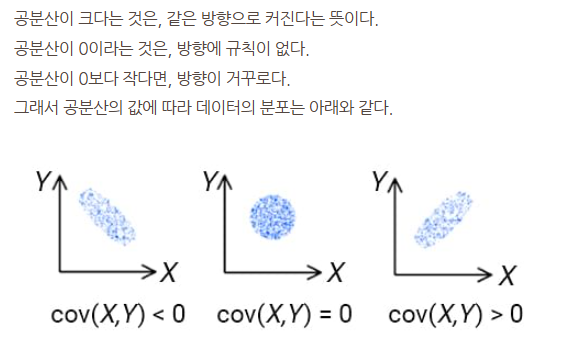


  공분산 값이 양수이면 X,Y는 선형관계가 있다.
  
  -> X가 커질때, Y도 커진다.

  공분산이 0이면 두 변수는 독립적이다.

  공분산이 음수이면 X가 커집에 따라 Y는 반대로 작아진다.

### 그럼 LDA에서 분산(및 공분산)을 왜 사용할까?

LDA에서는 데이터의 분산(및 공분산)을 사용하여 클래스 내부의 데이터가 얼마나 흩어져 있는지와 클래스 간의 차이를 수치로 나타내어 평가한다.

이를 통해서 데이터들을 가장 잘 구분할 수 있는 선형 변환(투영 방향)을 찾고, 최종적으로 분류 성능을 높이려는 것이다

분산과 공분산을 쉽게 설명해주는 링크: https://blog.naver.com/prayer2k/222624821291

### LDA와 PCA의 차이가 뭘까 ?

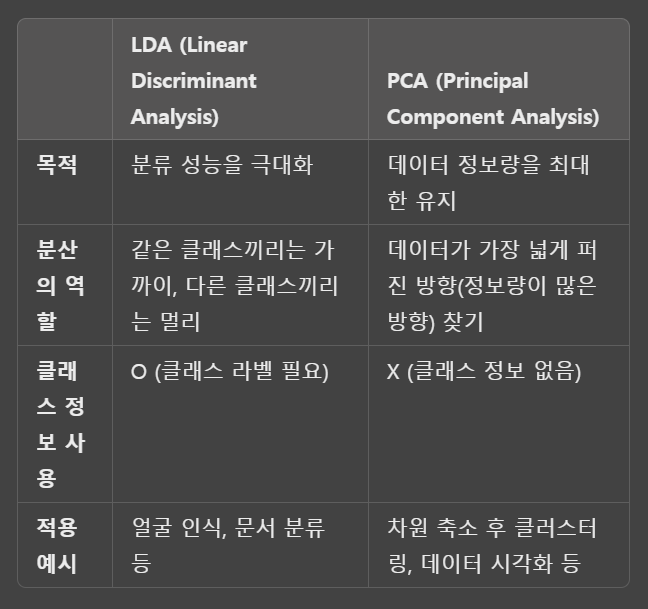

## - **Problem**
- sklearn 라이브러리에 있는 아이리스 데이터를 사용하여 3개의 꽃으로 분류할 것.

- 차원축소도 실습해서 시각화로 표현할 것

### **1. 라이브러리 가져오기**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

### **2. 데이터 불러오기 / 전처리 하기**

- **iris 구성**

  'target_names':예측하려는 값(class)를 가진 문자열 배열

  'target': label (출력데이터)

  'data': feature (입력 데이터)

  'features_name': 입력 변수 각 항목의 이름

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Target_Name: ",iris['target_names'][0:10])
print("Target: ",iris['target'][0:10])
print("Data: ",iris['data'][0:10])
print("Feature_name: ",iris['feature_names'][0:10])

iris_X = pd.DataFrame(data = iris['data'], columns =iris['feature_names'])
print("Iris_X: ",iris_X)

iris_Y = pd.DataFrame(data = iris['target'], columns =['target_names'])
print("Iris_Y",iris_Y)

Target_Name:  ['setosa' 'versicolor' 'virginica']
Target:  [0 0 0 0 0 0 0 0 0 0]
Data:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Feature_name:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris_X:       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2         

### **3. 훈련용 / 시험용 데이터셋 분리**

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(iris_X, iris_Y)

### **4. 데이터 정규화**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

print(train_X, train_Y)

[[-0.46869537 -0.95664894  0.31307385 -0.05635058]
 [ 0.72164207 -0.05247441  0.94126112  0.74934284]
 [-0.94483034  0.85170011 -1.34305622 -1.39917296]
 [ 2.15004699 -0.50456168  1.62655632  1.01790732]
 [-1.06386408  1.07774374 -1.28594829 -0.86204401]
 [-0.94483034  1.75587463 -1.11462449 -1.13060848]
 [-1.30193157 -0.05247441 -1.40016416 -1.26489072]
 [ 0.00743961 -0.05247441  0.19885798  0.34649613]
 [ 0.48357458 -0.27851805  0.99836905  0.74934284]
 [-1.18289783  0.17356922 -1.34305622 -1.39917296]
 [ 0.12647335 -0.73060531  0.71282938  0.48077837]
 [-0.46869537  2.66004916 -1.40016416 -1.39917296]
 [ 1.0787433  -0.50456168  0.54150558  0.21221389]
 [-1.06386408 -1.63477983 -0.31511342 -0.32491506]
 [ 0.48357458 -1.63477983  0.31307385  0.07793166]
 [ 0.48357458 -0.73060531  0.59861352  0.74934284]
 [-1.77806655 -0.27851805 -1.40016416 -1.39917296]
 [ 0.48357458 -1.18269257  0.65572145  0.88362508]
 [-1.06386408  1.07774374 -1.45727209 -1.26489072]
 [-0.46869537 -1.18269257  0.08

### **5. 모델 생성 및 학습 / 예측**


**fit() 함수**는
데이터를 학습하는 과정을 나타낸다. 즉 데이터를 기반으로 내부 매개 변수를 계산하거나 설정한다.

- **데이터 전처리**

  평균, 표준편차, 최대값, 최소값 등을 예로 들 수 있다. 이 값들을 계산하여 scaler 객체 내부에 저장한다.

- **머신러닝 모델**
  
  머신 모델에서는 데이터를 학습하여 최적의 가중치(weight)와 편향(bias)를 찾는 과정이다.

**transform() 함수**는

- **데이터 전처리**

  fit으로 학습된 정보를 사용하여 데이터를 변환하는 과정이다.

- **머신러닝**

  머신러닝 모델은 데이터를 변환하지 않으므로 transform()가 없다. 대신 예측(prediction())을 사용한다.







https://huidea.tistory.com/59 참조해서 코드를 작성함


LDA는 분류와 차원 축소를 동시에 처리할 수 있다.

- **분류**는 fit함수만 사용하면 되고,

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components= 2) # 2차원으로 줄임
LDA.fit(train_X, train_Y)

predict_Y = LDA.predict(test_X)
print("Predict: ",predict_Y)
print("Score: ",LDA.score(test_X, test_Y))

Predict:  [0 2 0 0 1 2 2 0 1 2 0 0 0 1 0 0 2 2 0 1 1 0 0 2 0 1 2 1 0 2 2 0 2 1 1 1 2
 0]
Score:  0.9736842105263158


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- **차원 축소**를 위해서는 transform 메서드를 사용한다.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components= 2) # 2차원으로 줄임
LDA.fit(train_X, train_Y)
train_X_LDA = LDA.transform(train_X)
test_X_LDA = LDA.transform(test_X)

print("Original Shape: ", train_X.shape)
print("After Shape: ", train_X_LDA.shape)


Original Shape:  (112, 4)
After Shape:  (112, 2)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
